In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
installs = pd.read_csv("../data/installs.csv", low_memory = False)

In [3]:
installs['user_agent'].value_counts()

MercadoPago/2.58.0.2 CFNetwork/976 Darwin/18.2.0                                                                                          393
MercadoPago/2.59.0.1 CFNetwork/976 Darwin/18.2.0                                                                                          141
MercadoPago/2.57.0.2 CFNetwork/976 Darwin/18.2.0                                                                                           89
Dalvik/2.1.0 (Linux; U; Android 8.1.0; SM-G610M Build/M1AJQ)                                                                               37
Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-J500M Build/MMB29M)                                                                              36
Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-G532MT Build/MMB29T)                                                                             36
Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-G570M Build/R16NW)                                                                               28
Dalvik

In [3]:
installs.columns

Index(['created', 'application_id', 'ref_type', 'ref_hash', 'click_hash',
       'attributed', 'implicit', 'device_countrycode', 'device_brand',
       'device_model', 'session_user_agent', 'user_agent', 'event_uuid',
       'kind', 'wifi', 'trans_id', 'ip_address', 'device_language'],
      dtype='object')

In [4]:
installs['wifi'].value_counts()

True     1377
False     352
Name: wifi, dtype: int64

In [5]:
installs['device_language'].value_counts()
##los 3 idiomas donde mas instalan publicidad(los 3idiomas donde hay gente mas corki)

3.301378e+18    1484
9.028383e+18     714
4.621024e+18     632
6.977049e+18     238
4.077062e+17      70
1.526421e+18      56
4.060930e+18      48
2.822843e+17      39
6.035180e+18      24
1.193279e+18      21
6.535228e+18      10
1.101539e+17       9
3.177265e+18       5
3.695787e+17       5
3.095856e+18       4
6.569908e+18       2
5.846217e+18       2
7.774316e+18       2
4.594650e+18       2
6.782349e+18       1
5.061642e+18       1
1.686906e+18       1
5.794427e+17       1
2.488366e+18       1
3.544544e+18       1
3.074904e+18       1
2.061937e+18       1
4.073835e+18       1
6.846873e+18       1
7.045130e+18       1
Name: device_language, dtype: int64

In [6]:
installs['device_countrycode'].value_counts()
##hay solo 2paises donde se instalan cosas

6333597102633388268    1820
2970470518450881158    1592
Name: device_countrycode, dtype: int64

In [7]:
installs.columns

Index(['created', 'application_id', 'ref_type', 'ref_hash', 'click_hash',
       'attributed', 'implicit', 'device_countrycode', 'device_brand',
       'device_model', 'session_user_agent', 'user_agent', 'event_uuid',
       'kind', 'wifi', 'trans_id', 'ip_address', 'device_language'],
      dtype='object')

In [8]:
installs['created'].value_counts()

2019-03-08 06:58:18.818    1
2019-03-10 02:55:01.385    1
2019-03-13 00:35:16.761    1
2019-03-07 12:35:33.455    1
2019-03-12 21:19:49.161    1
2019-03-08 18:46:30.448    1
2019-03-10 18:07:44.765    1
2019-03-13 01:33:49.479    1
2019-03-07 00:04:35.949    1
2019-03-08 21:42:54.760    1
2019-03-13 19:32:49.002    1
2019-03-13 23:24:18.347    1
2019-03-11 11:40:11.305    1
2019-03-05 22:32:36.473    1
2019-03-09 15:43:19.401    1
2019-03-06 23:39:29.983    1
2019-03-09 17:11:00.173    1
2019-03-08 01:23:45.992    1
2019-03-10 08:59:22.233    1
2019-03-12 14:39:29.129    1
2019-03-12 01:43:06.739    1
2019-03-05 10:15:00.747    1
2019-03-13 18:37:37.768    1
2019-03-12 21:49:48.610    1
2019-03-13 18:42:57.790    1
2019-03-12 20:16:34.651    1
2019-03-06 14:03:21.611    1
2019-03-10 15:39:25.806    1
2019-03-06 16:51:20.423    1
2019-03-10 22:46:06.356    1
                          ..
2019-03-05 10:02:00.417    1
2019-03-07 12:54:09.060    1
2019-03-10 22:41:40.742    1
2019-03-12 21:

In [9]:
installs.count()

created               3412
application_id        3412
ref_type              3412
ref_hash              3412
click_hash               0
attributed            3412
implicit              3412
device_countrycode    3412
device_brand          1047
device_model          3411
session_user_agent    3364
user_agent            1729
event_uuid             865
kind                   865
wifi                  1729
trans_id                 6
ip_address            3412
device_language       3378
dtype: int64

In [3]:
installs['attributed'].value_counts()

False    3412
Name: attributed, dtype: int64

In [4]:
installs['implicit'].value_counts()

False    2547
True      865
Name: implicit, dtype: int64

In [61]:
actividad = installs.loc[:,['created']]
actividad.head()

,created
0,2019-03-13 01:43:33.445
1,2019-03-13 04:58:35.078
2,2019-03-13 04:20:57.666
3,2019-03-13 04:20:57.698
4,2019-03-10 22:24:56.684


In [74]:
actividad = installs.loc[:,['created']]
actividad['created'] = pd.to_datetime(actividad['created'])
actividad['dia'] = actividad['created'].dt.day
actividad['hora'] = actividad['created'].dt.hour
actividad = actividad.loc[:,['dia', 'hora']].groupby(['dia', 'hora']).agg(np.size).reset_index()
actividad

,dia,hora,0
0,5,0,44
1,5,1,42
2,5,2,28
3,5,3,22
4,5,4,4
5,5,5,6
6,5,6,6
7,5,7,2
8,5,8,8
9,5,9,4


In [18]:
actividadInstalls = installs.loc[:,['created']]
actividadInstalls['created'] = pd.to_datetime(actividadInstalls['created'])
actividadInstalls["dia"] = actividadInstalls.loc[:,"created"].dt.date
actividadInstalls["hora"] = pd.to_datetime(actividadInstalls.loc[:,"created"].dt.strftime('%Y-%m-%d %H'))
actividadInstalls.head(10)

,created,dia,hora
0,2019-03-13 01:43:33.445,2019-03-13,2019-03-13 01:00:00
1,2019-03-13 04:58:35.078,2019-03-13,2019-03-13 04:00:00
2,2019-03-13 04:20:57.666,2019-03-13,2019-03-13 04:00:00
3,2019-03-13 04:20:57.698,2019-03-13,2019-03-13 04:00:00
4,2019-03-10 22:24:56.684,2019-03-10,2019-03-10 22:00:00
5,2019-03-10 22:24:57.545,2019-03-10,2019-03-10 22:00:00
6,2019-03-11 03:47:22.802,2019-03-11,2019-03-11 03:00:00
7,2019-03-11 21:21:05.986,2019-03-11,2019-03-11 21:00:00
8,2019-03-11 21:21:05.855,2019-03-11,2019-03-11 21:00:00
9,2019-03-13 08:29:31.875,2019-03-13,2019-03-13 08:00:00


In [12]:
events = pd.read_csv("../data/events.csv", low_memory = False)

In [14]:
actividadEvents = events.loc[:,['date', 'event_id']]
actividadEvents['date'] = pd.to_datetime(actividadEvents['date'])
actividadEvents["dia"] = actividadEvents.loc[:,"date"].dt.date
actividadEvents["hora"] = pd.to_datetime(actividadEvents.loc[:,"date"].dt.strftime('%Y-%m-%d %H'))
actividadEvents.head(10)

,date,event_id,dia,hora
0,2019-03-05 00:09:36.966,0,2019-03-05,2019-03-05 00:00:00
1,2019-03-05 00:09:38.920,1,2019-03-05,2019-03-05 00:00:00
2,2019-03-05 00:09:26.195,0,2019-03-05,2019-03-05 00:00:00
3,2019-03-05 00:09:31.107,2,2019-03-05,2019-03-05 00:00:00
4,2019-03-09 21:00:36.585,3,2019-03-09,2019-03-09 21:00:00
5,2019-03-09 20:29:45.449,4,2019-03-09,2019-03-09 20:00:00
6,2019-03-09 20:29:40.602,5,2019-03-09,2019-03-09 20:00:00
7,2019-03-09 20:45:12.067,0,2019-03-09,2019-03-09 20:00:00
8,2019-03-09 20:40:07.977,0,2019-03-09,2019-03-09 20:00:00
9,2019-03-09 20:27:09.984,1,2019-03-09,2019-03-09 20:00:00


In [20]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')


In [4]:
actividad = installs.loc[:,['created', 'application_id', 'ref_hash']]
actividad['created'] = pd.to_datetime(actividad['created'])
actividad['dia'] = actividad['created'].dt.day
actividad['hora'] = actividad['created'].dt.hour
actividad.head(10)

,created,application_id,ref_hash,dia,hora
0,2019-03-13 01:43:33.445,0,8464844987297247076,13,1
1,2019-03-13 04:58:35.078,0,3250564871270161533,13,4
2,2019-03-13 04:20:57.666,0,7953318831018100268,13,4
3,2019-03-13 04:20:57.698,0,7953318831018100268,13,4
4,2019-03-10 22:24:56.684,0,8355110941557237501,10,22
5,2019-03-10 22:24:57.545,0,8355110941557237501,10,22
6,2019-03-11 03:47:22.802,0,4306303321567254439,11,3
7,2019-03-11 21:21:05.986,0,1670430602051291592,11,21
8,2019-03-11 21:21:05.855,0,1670430602051291592,11,21
9,2019-03-13 08:29:31.875,2,5651666841804012468,13,8


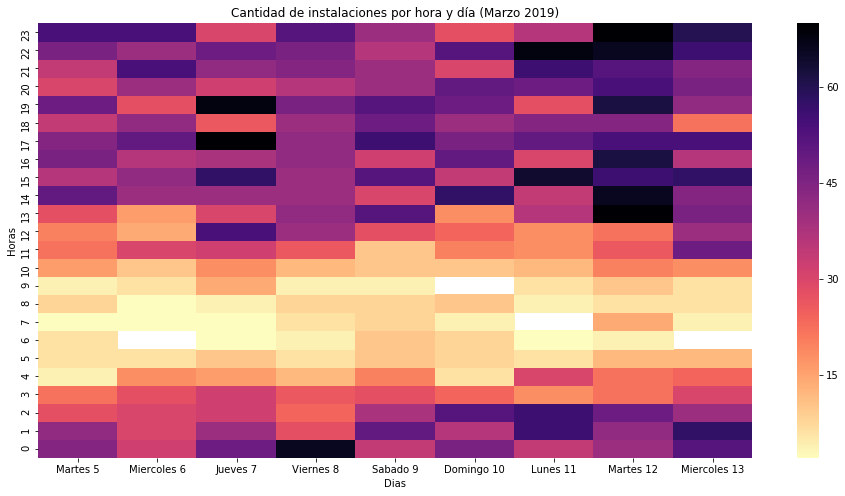

In [6]:
actividad2 = actividad.loc[:,['dia', 'hora']].groupby(['dia', 'hora']).agg(np.size).reset_index()
pivoted = pd.pivot_table(actividad2, values=0, columns='dia', index='hora')
fig, ax = plt.subplots(figsize=(16,8))
g = sns.heatmap(pivoted,cmap='magma_r');
g.set_title("Cantidad de instalaciones por hora y día (Marzo 2019)")
g.set_xlabel('Dias')
g.set_ylabel('Horas')
g.set_xticklabels(['Martes 5', 'Miercoles 6','Jueves 7','Viernes 8','Sabado 9','Domingo 10', 'Lunes 11', 'Martes 12', 'Miercoles 13'])
g.invert_yaxis()

In [93]:
ventana = (actividad['dia'] == 13) & (actividad['hora'] == 17)
mayorActividadJueves = actividad[ventana]
mayorActividadJueves['ref_hash'].sort_values()

1503     251794230142176770
2975     338768872643810232
1315    1969654411599738598
2802    2626083020427301525
1316    2878797188545428856
1319    2878797188545428856
1313    2902161808359787635
2978    2922499997145591714
2973    3044317275567346661
1317    4434047931579256917
1314    4636056859771839523
1318    4881524263181588033
2839    5001073588324022985
2838    5001073588324022985
803     5466408851328843436
805     5881939520749464144
3360    5905544385576891453
2805    6270960387971284352
804     6841904787683987904
3359    7238347172348868382
2803    7439129089589692126
2804    7504014376956506924
2974    7715979609595997758
2976    7910718666288795248
2977    7910718666288795248
3358    8983748945836980508
1312    9093513155894966633
Name: ref_hash, dtype: int64

In [8]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 18 columns):
created               3412 non-null object
application_id        3412 non-null int64
ref_type              3412 non-null int64
ref_hash              3412 non-null int64
click_hash            0 non-null float64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null int64
device_brand          1047 non-null float64
device_model          3411 non-null float64
session_user_agent    3364 non-null object
user_agent            1729 non-null object
event_uuid            865 non-null object
kind                  865 non-null object
wifi                  1729 non-null object
trans_id              6 non-null object
ip_address            3412 non-null int64
device_language       3378 non-null float64
dtypes: bool(2), float64(4), int64(5), object(7)
memory usage: 433.2+ KB


In [7]:
installs['attributed'].value_counts()

False    3412
Name: attributed, dtype: int64

Ninguna de las instalaciones en el archivo fueron atribuidas a Jampp

In [9]:
installs['implicit'].value_counts()

False    2547
True      865
Name: implicit, dtype: int64

REPUESTA DE JAVIER SOBRE INSTALLS """En installs se almacenan instalaciones atribuidas o implícitas de las apps que son clientes de Jampp. En las subastas RTB puede venir un espacio de publicidad desde cualquier app, no solo las que son clientes de Jampp (a estas apps se las llama publishers). Estas apps en general ofrecen su inventario (espacios de publicidad) a un ad exchange (lo que nosotros llamamos sources) y desde ahí se hacen las subastas en las que participa Jampp. Cuando se instala desde un ad mostrado por Jampp el exchange es notificado y ellos nos avisan. Si luego vemos un nuevo device en la data orgánica, podemos inferir la instalación por otro canal.
Una simplificación bastante correcta de la respuesta a esa pregunta sería que un DSP (jampp) muestre publicidad y por como es el mecanismo de atribucion no se le atribuye si hay instalación. Entonces, la instalación no es "atribuida" pero siendo que tenemos el callback de la instalación, sabemos que pasó, como no lo vimos desde eventos posteriores, no es "implícita"."""

In [11]:
installs['kind'].value_counts()

af_app_opened                 428
app_open                      212
EVENT_Homepage                 70
open                           36
EVENT_OPEN_APP                 33
Open                           22
login_success                  17
account_summary_first_step     13
EVENT_HOMEPAGE                  6
EVENT_LISTINGVIEW_FLIGHT        6
deeplink                        5
reattribution                   4
registration                    3
payment method add              3
journey first drop off          2
af_list_view                    1
journey reserved                1
EVENT_PROMO                     1
install                         1
journey drop off                1
Name: kind, dtype: int64

In [41]:
events[events['ref_hash'] == 8355110941557237501]

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
3322,2019-03-10 22:24:56.684,31,1891515180541284343,8355110941557237501,0,False,6333597102633388268,7.391844e+18,1.083369e+18,7.876612e+18,...,NaN,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,5.851846e+18,8.820572e+18,NaN,NaN,NaN,685400811232710215,3.301378e+18


In [28]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [42]:
installs['application_id'].value_counts()

7     947
9     731
10    389
16    362
8     328
2     174
29     97
20     95
6      35
1      34
26     28
34     28
15     20
0      18
3      17
28     17
12     15
18     14
24     13
17     13
14     13
21      7
5       3
13      3
33      2
30      2
19      2
32      2
36      1
4       1
23      1
Name: application_id, dtype: int64

In [44]:
installs['ip_address'].value_counts().head(10)

1992632945768888579    33
2403839579048525602    26
2394721645995561079    17
589886713227299026     16
8262991154202232888    14
8010533080341024188    13
8531002764348621869    12
7726314782926052608    12
7481987231813232849    11
2441645233986204328    11
Name: ip_address, dtype: int64

In [45]:
installs[installs['ip_address'] == 1992632945768888579]

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
58,2019-03-10 17:37:11.998,2,1891515180541284343,5487018566680760822,NaN,False,False,6333597102633388268,4.371308e+18,7.286156e+17,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 7.0; Lenovo K3...,NaN,NaN,True,NaN,1992632945768888579,9.028383e+18
59,2019-03-10 00:27:11.131,2,1891515180541284343,4256346209371278943,NaN,False,True,6333597102633388268,2.208835e+18,8.240213e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 8.0.0; Moto Z2...,78838e65-8a9f-4644-a72a-e3866f6775a5,open,True,NaN,1992632945768888579,9.028383e+18
63,2019-03-10 14:38:05.464,2,1891515180541284343,4012743072911938567,NaN,False,False,6333597102633388268,3.083059e+17,5.960896e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-G935...,NaN,NaN,True,NaN,1992632945768888579,9.028383e+18
64,2019-03-10 14:36:55.733,2,1891515180541284343,5944703426070771098,NaN,False,False,6333597102633388268,3.083059e+17,3.285184e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 7.0; SM-G928G ...,NaN,NaN,True,NaN,1992632945768888579,9.028383e+18
66,2019-03-10 14:54:02.648,2,1891515180541284343,5129780403184854828,NaN,False,False,6333597102633388268,5.137992e+17,3.394347e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 5.0.2; Redmi N...,NaN,NaN,True,NaN,1992632945768888579,9.028383e+18
67,2019-03-10 14:51:43.261,2,1891515180541284343,5129780403184854828,NaN,False,True,6333597102633388268,5.137992e+17,3.394347e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 5.0.2; Redmi N...,0c8f0c41-6ad5-41fd-828c-2f69dc227438,open,True,NaN,1992632945768888579,9.028383e+18
102,2019-03-12 15:11:07.895,2,1891515180541284343,482100949468188443,NaN,False,False,6333597102633388268,3.083059e+17,9.098443e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-G532...,NaN,NaN,True,NaN,1992632945768888579,9.028383e+18
868,2019-03-07 14:22:57.039,2,1891515180541284343,3302086933387973849,NaN,False,False,6333597102633388268,3.083059e+17,7.116343e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-J500...,NaN,NaN,True,NaN,1992632945768888579,9.028383e+18
877,2019-03-07 23:01:03.085,2,1891515180541284343,7054149360879771998,NaN,False,True,6333597102633388268,2.208835e+18,8.240213e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 8.0.0; Moto Z2...,da52d2da-c454-4b10-b84a-f863c07e877f,open,True,NaN,1992632945768888579,9.028383e+18
897,2019-03-08 01:17:16.593,2,1891515180541284343,8670028190594846665,NaN,False,False,6333597102633388268,2.208835e+18,2.510073e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 5.1; XT1033 Bu...,NaN,NaN,True,NaN,1992632945768888579,9.028383e+18
